# Week 2

## Activity 2

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [13]:
def diffyqs(t, curr_vals, omega2):
    # 2 first-order differential equations for a SHO
    # first 2 arguments are always t and curr_vals, which are followed by any parameters of your ODEs
    x, v = curr_vals   # unpack current values
    
    vdot = -omega2 * x # calculate derivative

    return v, vdot # return derivatives

In [14]:
tmax = 15
dt = 0.1
tspan = (0, tmax)         # time span
t = np.arange(0, tmax, dt) # specific times to return solutions for

In [15]:
omega2 = 2
initial_condition = [1, 0] # pull back 1m, no initial velocity

In [16]:
solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2, ), method="RK45")


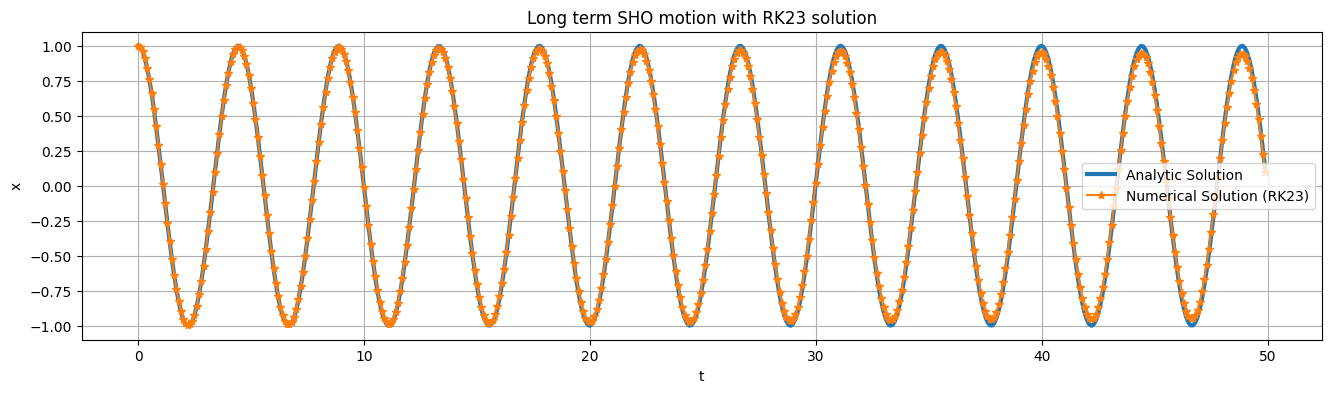

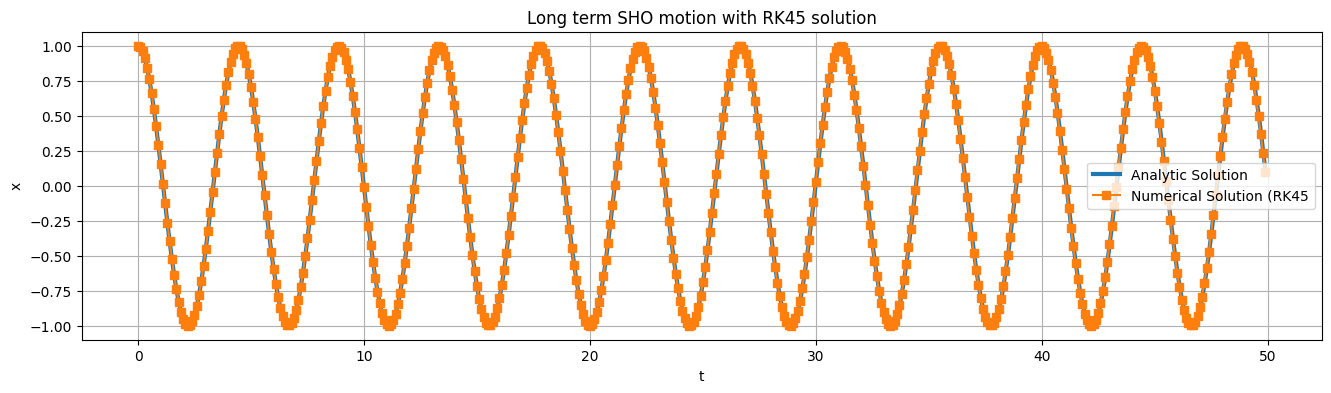

In [61]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, omega2):
    x, v = curr_vals 
    vdot = -omega2 * x
    return v, vdot

# 2. Time Setup
tmax = 50
dt = 0.1
tspan = (0, tmax)
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
omega2 = 2
initial_condition = [1, 0] 

# 4. Call Integrator (RK45 is the default)
RK23solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK23")
RK45solved = solve_ivp(diffyqs, tspan, initial_condition, t_eval = t, args = (omega2,), method="RK45")

# 5. Visualization and Comparison to analytical solution
def analytic_sol(t, omega0, initial_condition):
    x0, v0 = initial_condition
    return (v0/omega0)*np.sin(omega0*t) + x0 * np.cos(omega0*t)

plt.figure(figsize=(16, 4))
plt.plot(t, analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t, RK23solved.y[0], label = "Numerical Solution (RK23)", marker='*')
plt.title("Long term SHO motion with RK23 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

plt.figure(figsize=(16,4))
plt.plot(t,analytic_sol(t, omega2**0.5,initial_condition), label = "Analytic Solution", linewidth = 3)
plt.plot(t,RK45solved.y[0], label = "Numerical Solution (RK45", marker='s')
plt.title("Long term SHO motion with RK45 solution")
plt.xlabel("t")
plt.ylabel("x")
plt.legend()
plt.grid()

Next part

$z = c\rho^2$

$$
\dot v = \ddot \rho = \frac{\rho \dot \phi^2 - 4 c^2 \rho \dot \rho^2 - 2cg\rho }{1 + 4c^2 \rho^2} \\
= \frac{\rho \omega^2 - 4 c^2 \rho v^2 - 2cg\rho }{1 + 4c^2 \rho^2}\\


\dot \omega = \ddot \phi = -2\frac{\dot \rho \dot \phi}{\rho}\\
= -2\frac{v \omega}{\rho}\\

\omega = \dot \phi 
$$

In [38]:
# 1. Derivatives Function
def diffyqs(t, curr_vals, g, c):

    r, v, theta, omega = curr_vals
    
    vdot = (r * omega**2 - 4 * c**2 * r * v**2 - 2 * c *g * r)/(1+ 4 * c**2 * r**2)

    omegadot = -2 * v * omega / r

    return v, vdot, omega, omegadot # solution will return in this order, but integrated (r,v,theta,ω)

# 2. Time Setup
tmax = 40
dt = 0.01 # unneccecarily small dt to make plot super smooth
t = np.arange(0, tmax, dt)

# 3. Parameters and Initial Conditions
c = 1
g = 1
x0 = [2.6,0,0,4] #r, v, theta, omega

# 4. Call Integrator
solved = solve_ivp(diffyqs, (0, tmax), x0, t_eval = t, args = (g, c, ), method="RK45")

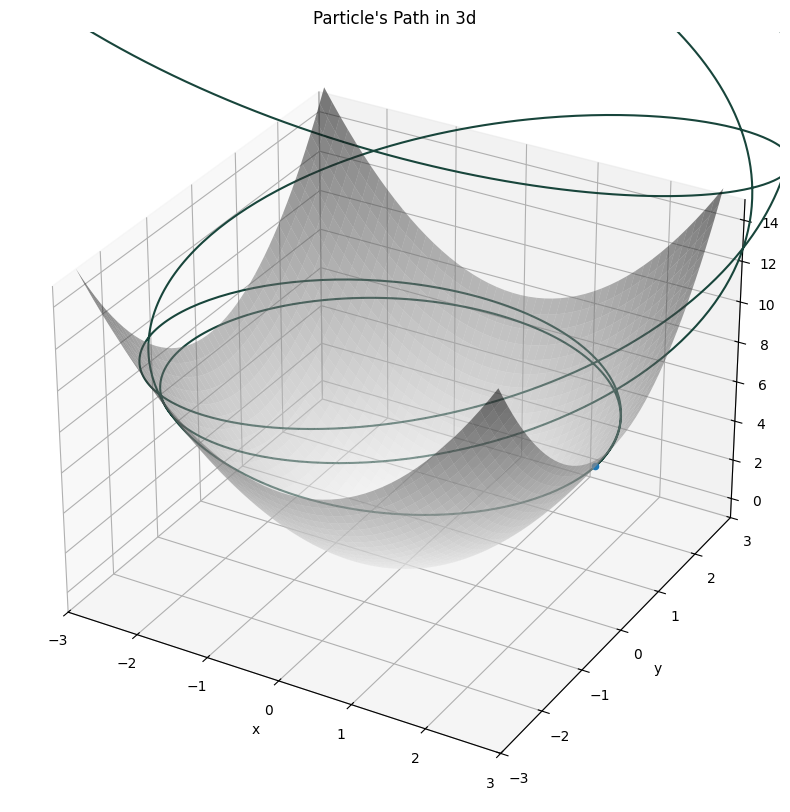

In [49]:
def parabaloid(x, y, alpha=1.):
    # function of a paraboloid in Cartesian coordinates
    return alpha * (x**2 + y**2)

def cylindrical_to_cartesian(r, th, alpha=1.):
    # convert back to cartesian coordinates for ease of plotting
    r = np.array(r)
    th = np.array(th)
    x = r*np.cos(th)
    y = r*np.sin(th)
    return x,y,parabaloid(x, y, alpha)

def plot_solution(solved):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.plot3D(xtraj, ytraj, ztraj, c = "#18453B")
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.scatter(xtraj[0], ytraj[0], ztraj[0])
    plt.show()

plot_solution(solved)

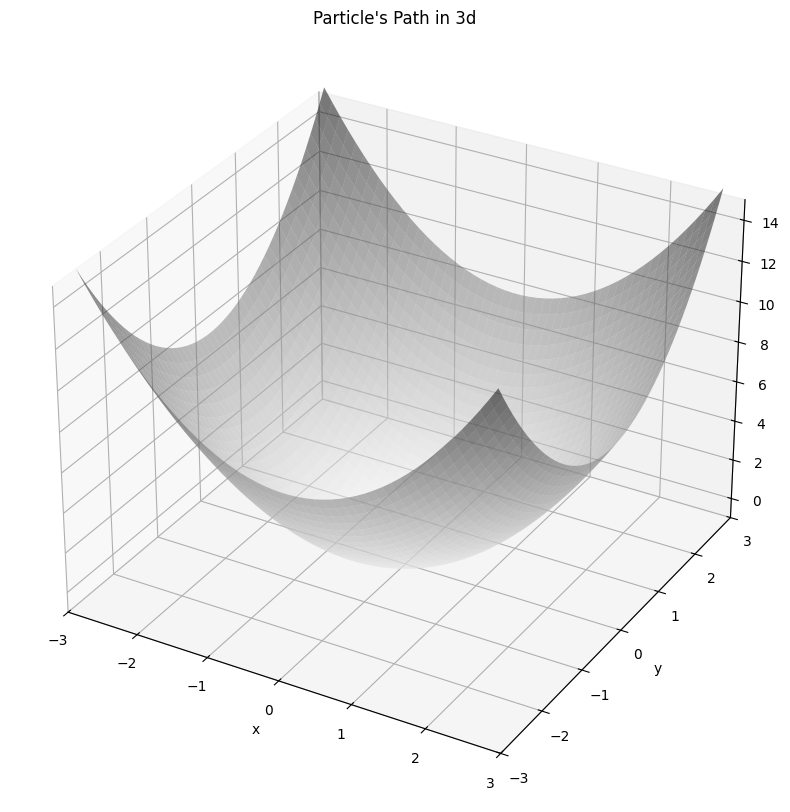

In [57]:
from matplotlib.animation import PillowWriter

def plot_video(solved, tmax, dt):
    # Function to plot the trajectory 

    # points of the surface to plot
    x = np.linspace(-2.8, 2.8, 50)
    y = np.linspace(-2.8, 2.8, 50)
    alpha = c
    # construct meshgrid for plotting
    X, Y = np.meshgrid(x, y)
    Z = parabaloid(X, Y, alpha)

    # get trajectory in cartesian coords
    xtraj, ytraj, ztraj = cylindrical_to_cartesian(solved.y[0], solved.y[2], alpha)

    # plot plot plot
    fig = plt.figure(figsize = (10,10))
    ax = plt.axes(projection='3d')
    plt.title("Particle's Path in 3d")
    ax.plot_surface(X, Y, Z, cmap='binary', alpha=0.5) 
    ax.set_xlim(-3, 3); ax.set_ylim(-3, 3); ax.set_zlim(-1 ,15)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

    frames = tmax / dt
    metadata = {'title': 'Movie', 'artist': 'AndrewKoren'}
    capture_rate = 50 # captures 1/rate frames
    writer = PillowWriter(fps=frames/capture_rate)
    with writer.saving(fig, 'chaos.gif', 100):
        for tval in range(int(frames)):

            
            writer.grab_frame()





    
    
plot_video(solved)

AttributeError: 'ArtistList' object has no attribute 'remove'

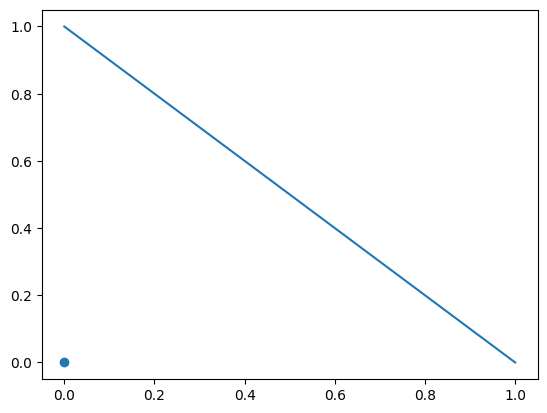

In [77]:
fig, ax = plt.subplots(1, 1)
ax.scatter(0, 0)
ax.plot([1,0], [0,1])
ax.

# Week 3

Day 1: SHO

1. 1D oscillator

$\dot x = x^2 -1 $

For $x<1$ it will move to $x=-1$, for $x>1$ it will fly away. At x=0 it will be stable. 

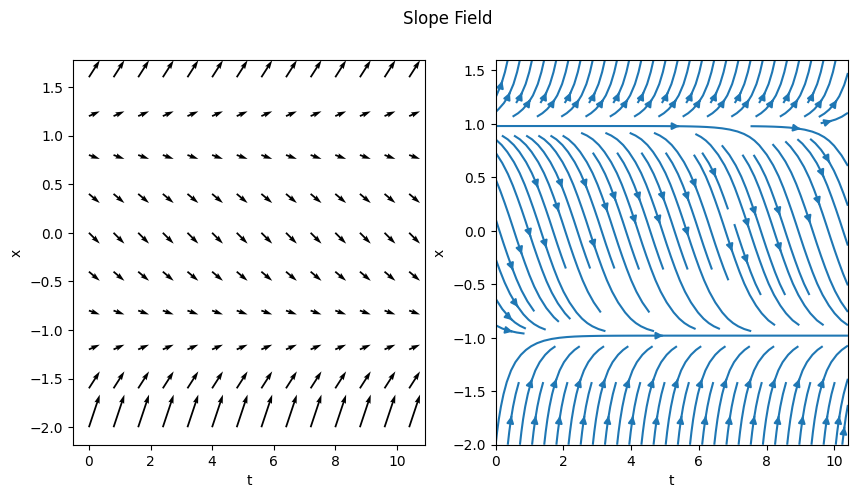

In [1]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(0, 11, 0.8)
x = np.arange(-2, 2, 0.4)

# Make grid
T, X = np.meshgrid(t, x)

# calculate derivative (dt is const so just use ones)
dx = X**2 - 1
dt = np.ones(dx.shape)

# plot
fig = plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.quiver(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.subplot(1,2,2)
plt.streamplot(T,X,dt,dx)
plt.xlabel("t")
plt.ylabel("x")
plt.suptitle("Slope Field")
plt.show()

Analytical solution:

$$
\dot x = x^2 -1 \\
x = \int \dot x dx = \frac{1}{3} x^3 - x + c \\
\ddot x = 2x
$$

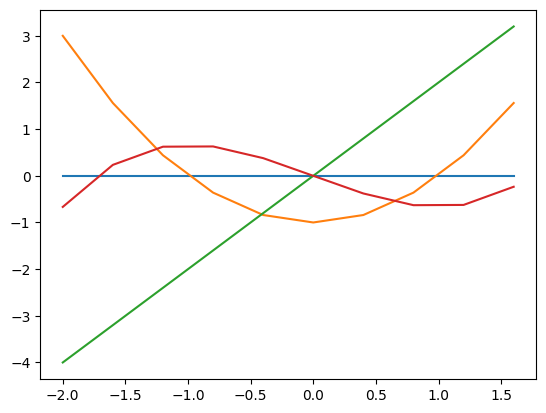

In [6]:
c = 0

def velocity(x):
    return x**2 - 1

def accel(x):
    return 2*x

def positionf(x):
    return x**3/3 - x + c

x = np.arange(-2, 2, 0.4)

plt.plot(x,[0 for i in x])
plt.plot(x,velocity(x))
plt.plot(x,accel(x))
plt.plot(x,positionf(x))
plt.show()


2. phase space sho

$$
\dot x = v_x \\
\dot v_x = -\omega^2 x
$$



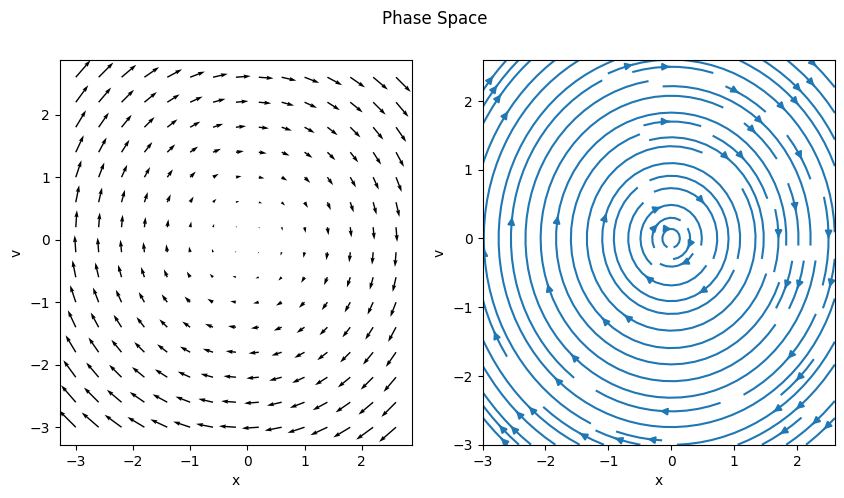

In [59]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-3, 3, 0.4)
v = np.arange(-3, 3, 0.4)

# Make grid
X, V = np.meshgrid(x, v)

def oscillator(X, V, params):
    omega = params
    xdot, vdot = [V, - omega ** 2 * X]
    return xdot, vdot

def get_points(X, V, func, params):
    dx, dv =  np.zeros(X.shape), np.zeros(V.shape)

    xlim, ylim = X.shape
    for i in range(xlim):
        for j in range(ylim):
            xloc = X[i,j]
            vloc = V[i,j]
            dx[i,j], dv[i,j] = func(xloc, vloc, params)
    
    return(dx, dv)

dx, dv = get_points(X, V, oscillator, 1)

def make_phase_space(X, V, dx, dv):
    fig = plt.figure(figsize = (10,5))
    plt.subplot(1,2,1)
    plt.quiver(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.subplot(1,2,2)
    plt.streamplot(X,V,dx,dv)
    plt.xlabel("x")
    plt.ylabel("v")
    plt.suptitle("Phase Space")
    plt.show()
make_phase_space(X, V, dx, dv)

Pendulum

$$
\mathcal{L}  = \frac{1}{2}I \omega^2 + mgh \\
h = L - L\cos(\theta) = 2L \sin^2\left(\frac{\theta}{2}\right) \\
I = mL^2 \\
\mathcal{L} = \frac{1}{2} mL^2 \dot \theta^2 + mgL(1-\cos(\theta))$$

Now we do the solving part

$$
\frac{\partial \mathcal{L}}{\partial \theta} = \frac{d}{dt} \frac{\partial \mathcal{L}}{\partial \dot \theta} \\

$$

$$
\frac{\partial \mathcal{L}}{\partial \dot \theta} = mL^2 \dot \phi \\
\frac{d}{dt} mL^2 \dot \phi = mL^2 \ddot \phi \\
\frac{\partial \mathcal{L}}{\partial  \theta} = mgL\sin(\theta) \\
mL^2 \ddot \phi = mgL \sin(\theta) \\
\ddot \phi = \frac{g}{L} \sin(\theta)
$$

Now we can make our function

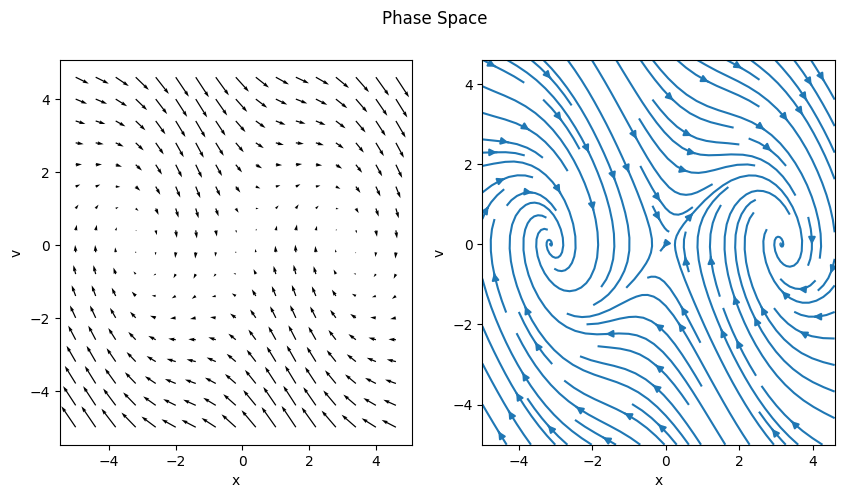

In [60]:
def pendulum(theta, omega, params:list):
    g, L, b = params
    dtheta, domega = [omega, g / L * np.sin(theta) - b*omega]
    return dtheta, domega

x = np.arange(-5, 5, 0.6)
v = np.arange(-5, 5, 0.6)
X, V = np.meshgrid(x, v)


dx, dv = get_points(X, V, pendulum, [9.81, 4, 1])

make_phase_space(X, V, dx, dv)

Jacobian:

$$
J = \begin{bmatrix}
\frac{\partial f}{\partial \theta} &\frac{\partial f}{\partial \dot \theta} \\ \frac{\partial g}{\partial \theta} & \frac{\partial g}{\partial \dot \theta} 
\end{bmatrix} = \begin{bmatrix} 0 & 1 \\ \frac{g}{L}\cos(\theta) & 0 \end{bmatrix}
$$

Damped:

$$
J = \begin{bmatrix} 0 & 1 \\ \frac{g}{L}\cos(\theta) & -b \end{bmatrix}
$$



Eigenvalues
$$
\lambda^2 - \frac{g}{L} \cos (\theta) = 0 \\
\lambda = \pm \sqrt{\frac{g}{L} \cos (\theta)}
$$
Dampled
$$
-b\lambda^2 - \frac{g}{L} \cos (\theta) = 0 \\
\lambda = \pm \sqrt{-\frac{g}{bL} \cos (\theta)}
$$

## Day 2 - doing an ODE

$\ddot x = - \mu (x^2-1)\dot x - x$

Note that this equation is simply the harmonic oscillator when $ \mu=0$. The strange $ -\mu(x^2-1)\dot{x} $ term represents damping, but this damping behaves strangely, because when $ |x |<1$, it is negative damping, that is it boosts oscillations smaller than $1$, while still slowing down oscillations larger than $ 1$.</p>
<p>Now we play the usual game of trying to figure out how this system behaves:</p>
<p>1. Identify the fixed point of this system. Follow the linearization procedure to characterize it.</p>
<p>2. Edit the code below to produce a phase plot for the Van der Pol oscillator. This code also numerically integrates a trajectory and plots it. Add a second trajectory and plot that as well.</p>
<p>3. What happens to phase space when you change the value of $\mu$  What if you make it negative?</p>
<p>4. What behavior do you notice here that’s different than you’ve seen before? What is attracting the trajectories?</p>
<p>5. Based on the phase space diagram, what do you expect actual trajectories to look like in $x$ vs $t$ space? Use the numerically integrated trajectories to plot that.&nbsp;</p>


# Week 4

Some important notes:

Fixed points occur when $\frac{dU}{dx} = 0$

Phase portraits are dx dv models for various values of x and v (or other values), they are made by plugging values into a diffeq






## Duffing oscillator speed run

$$
\ddot x = - \delta \dot x - \alpha x - \beta x^3 + \gamma \cos(\omega t)
$$

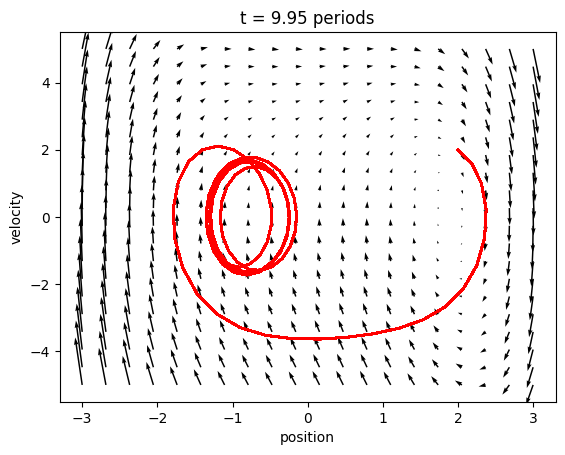

In [132]:
from matplotlib.animation import PillowWriter
import matplotlib.pyplot as plt
import numpy as np
from numpy import cos, pi
from scipy.integrate import solve_ivp

fig = plt.figure()


# generate each frame

def duffing(t, p0, params):
    x, v = p0
    alpha, beta, delta, gamma, omega = params
    dx = v
    dv = -delta * v - alpha * x - beta * x**3 + gamma * cos(omega * t)
    return dx, dv

alpha = -1
beta = 1
delta = 1
gamma = 5
omega = pi

parameters = [alpha, beta, delta, gamma, omega]


def generate_phase_space(x_lim, v_lim, grid_size, parameters, t):

    x = np.linspace(x_lim[0], x_lim[1], grid_size)
    v = np.linspace(v_lim[0], v_lim[1], grid_size)
    
    X, V = np.meshgrid(x, v)
    
    dX, dV = duffing(t, (X,V), parameters)
    
    return X, V, dX, dV

x_lim = (-3, 3)
v_lim = (-5, 5)
grid_size = 20

X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, parameters, 0)

#field1 = plt.streamplot(X, V, dX, dV)
field1 = plt.quiver(X, V, dX, dV)


# creating the animation

metadata = dict(title='Movie', artist='AndrewKoren')
writer = PillowWriter(fps=15, metadata=metadata)

data = []

initial_condition = [2, 2]
end = 20
dt = 0.1

tspan = np.arange(0, end, dt)
solution = solve_ivp(duffing, (0, end), initial_condition, t_eval = tspan, args=[parameters])

with writer.saving(fig, 'duffing.gif', 100):
    for i, tval in enumerate(tspan):
        
        X, V, dX, dV = generate_phase_space(x_lim, v_lim, grid_size, parameters, tval)
        plt.title(f't = {tval*omega/(2*np.pi):.2f} periods')
        plt.xlabel('position')
        plt.ylabel('velocity')

        #plt.streamplot(X, V, dX, dV, color='blue')
        field1.set_UVC(dX, dV)

        plt.plot(solution.y[0][:i+1], solution.y[1][:i+1], color='red')
        writer.grab_frame()
        #plt.cla()


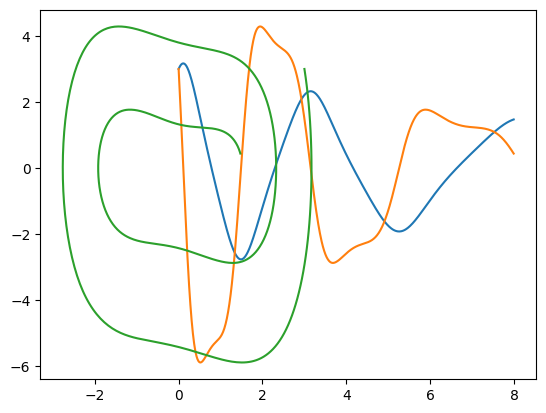

In [117]:
solution

plt.plot(solution.t, solution.y[0])
plt.plot(solution.t, solution.y[1])

plt.plot(solution.y[0], solution.y[1])